In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [105]:
iris_data = pd.read_csv('Iris/iris.data', names=['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm','class'])
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [106]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


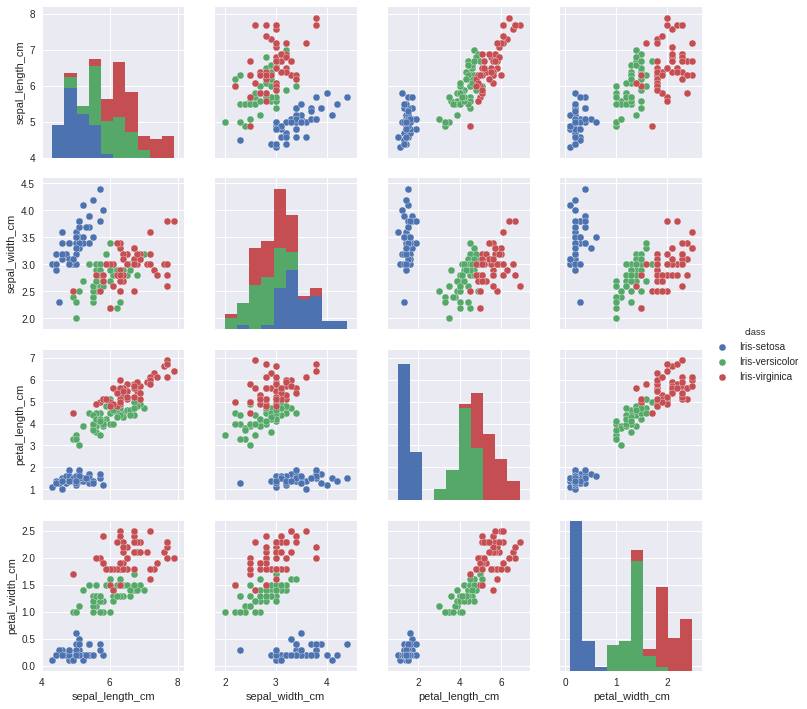

In [107]:
%matplotlib inline
sb.pairplot(iris_data, hue='class')

In [108]:
np.any(iris_data.isnull())

False

In [116]:
def averageDistToCenter(X,C):
    avdist = np.sum(np.sqrt(np.sum((X - C)**2,axis=0)),axis=0)
    avdist /= np.maximum(np.size(X,axis=1),1)
    return avdist

def KMeans(K, X, doPrinting=False):
    d = np.size(X,axis=0)
    N = np.size(X,axis=1)
    I = np.eye(K)
    R = X[:,np.random.randint(0,N,K)] #random start centers
    M = np.zeros((d,K)).astype(int)
    changes = True
    iters = 0
    while changes:
#         D = np.sum((R.T[np.newaxis,:,:] - X.T[:,np.newaxis,:])**2., axis=-1).T # distances from centers
        D = -2. * np.dot(X.T,R) + np.sum(R**2,axis=0,keepdims=True)# it is not necessary to add X^2
        m = np.argmin(D, axis=1)
        newM = np.take(I,m,axis=0).astype(int) # matrix of membership
        changes = not np.array_equal(M,newM)
        M = newM
        R = np.dot(X,M)/np.maximum(np.sum(M.T,axis=1),1) # new centers
        iters +=1
    if doPrinting:
        avDistToCenter = np.array([averageDistToCenter(X[:,M[:,i] == 1], R[:,i,np.newaxis]) for i in range(K)])
        groupSizes = np.sum(M.T,axis=1)
        print('Average distance to center within groups:\n',avDistToCenter)
        print("Iterations: ", iters, "\n")
        print("Group sizes: ", groupSizes, "\n")
    return R, M, m, groupSizes

In [117]:
irisOperData = iris_data.iloc[:,:4].values.T
R, M, m, groupSizes = KMeans(3, irisOperData, doPrinting=True)

Average distance to center within groups:
 [ 0.73815237  0.71983855  0.48413225]
Iterations:  6 

Group sizes:  [62 38 50] 



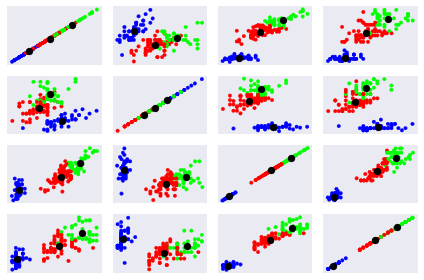

In [118]:
d = irisOperData.shape[0]
for i in range(d):
    for j in range(d):
        plt.subplot(d, d, i*d+j+1)
        plt.scatter(irisOperData[i, :], irisOperData[j, :], c=M, marker='.')
        plt.scatter(R[i,:], R[j,:], c="Black", marker='o')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()

In [122]:
irisOperData.shape

(4, 150)

In [134]:
for i in range(3):
    print('Group: ', i, ' # Size: ',groupSizes[i], ' # Results: ')
    for c in ['Iris-setosa','Iris-versicolor','Iris-virginica']:
        s = np.sum(M.T[i,iris_data.values[:,4]==c])
        print(c, s, ' -> ', s/groupSizes[i])


Group:  0  # Size:  62  # Results: 
Iris-setosa 0  ->  0.0
Iris-versicolor 48  ->  0.774193548387
Iris-virginica 14  ->  0.225806451613
Group:  1  # Size:  38  # Results: 
Iris-setosa 0  ->  0.0
Iris-versicolor 2  ->  0.0526315789474
Iris-virginica 36  ->  0.947368421053
Group:  2  # Size:  50  # Results: 
Iris-setosa 50  ->  1.0
Iris-versicolor 0  ->  0.0
Iris-virginica 0  ->  0.0


In [138]:
R, M, m, groupSizes = KMeans(3, irisOperData[:2,:], doPrinting=True)

Average distance to center within groups:
 [ 0.43931167  0.43076347  0.38814568]
Iterations:  22 

Group sizes:  [51 46 53] 



In [139]:
for i in range(3):
    print('Group: ', i, ' # Size: ',groupSizes[i], ' # Results: ')
    for c in ['Iris-setosa','Iris-versicolor','Iris-virginica']:
        s = np.sum(M.T[i,iris_data.values[:,4]==c])
        print(c, s, ' -> ', s/groupSizes[i])

Group:  0  # Size:  51  # Results: 
Iris-setosa 50  ->  0.980392156863
Iris-versicolor 0  ->  0.0
Iris-virginica 1  ->  0.0196078431373
Group:  1  # Size:  46  # Results: 
Iris-setosa 0  ->  0.0
Iris-versicolor 12  ->  0.260869565217
Iris-virginica 34  ->  0.739130434783
Group:  2  # Size:  53  # Results: 
Iris-setosa 0  ->  0.0
Iris-versicolor 38  ->  0.716981132075
Iris-virginica 15  ->  0.283018867925
